In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xclim 
import xarray as xr
from pathlib import Path
# import dask 
import os 

In [3]:
from Barcelona import indicators_Barcelona as iB 

In [4]:
import numpy as np 
import xarray as xr

import geopandas as gpd


import rioxarray
import xarray
from shapely.geometry import mapping


In [5]:
path_data = Path('/mnt/stg/climate/CHELSA/CHELSA_EUR11/obs/daily/tasmax/')
outpath = '/mnt/stg/climate/CHELSA/CHELSA_EUR11/indicators/txx/'

# Catalonia
lat_min, lat_max = 40.3, 42.6
lon_min, lon_max = -1.3, 3.4

# nc_files = list(path_data.glob("*_V1.1.nc") )
# nc_files


In [6]:
years = range(1990, 2006)

data_dir = '/mnt/stg/climate/CHELSA/CHELSA_EUR11/obs/daily/tasmax/' 
datasets = []

for year in years:
    file_path = os.path.join(data_dir, f"CHELSA_EUR11_tasmax_day_{year}_V1.1.nc")
    try:
        with xr.open_dataset(file_path, engine="netcdf4") as ds:
            # Subset before loading into memory
            ds_subset = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
            
            # Actually load data into memory now
            datasets.append(ds_subset.load())
            print(f"Year {year}: loaded")
    except Exception as e:
        print(f"Skipping year {year}: {e}")

# Concatenate all loaded subsets along the time dimension
combined = xr.concat(datasets, dim="time")


Year 1990: loaded
Year 1991: loaded
Year 1992: loaded
Year 1993: loaded
Year 1994: loaded
Year 1995: loaded
Year 1996: loaded
Year 1997: loaded
Year 1998: loaded
Year 1999: loaded
Year 2000: loaded
Year 2001: loaded
Year 2002: loaded
Year 2003: loaded
Year 2004: loaded
Year 2005: loaded


In [7]:
combined

<xarray.Dataset> Size: 4GB
Dimensions:  (time: 5844, lat: 276, lon: 564)
Coordinates:
  * time     (time) datetime64[ns] 47kB 1990-01-01T12:00:00 ... 2005-12-31T12...
  * lon      (lon) float64 5kB -1.296 -1.288 -1.279 -1.271 ... 3.379 3.387 3.396
  * lat      (lat) float64 2kB 40.3 40.31 40.32 40.33 ... 42.57 42.58 42.59 42.6
Data variables:
    crs      (time) int32 23kB 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    tasmax   (time, lat, lon) float32 4GB 8.25 8.25 8.25 8.25 ... nan nan nan
Attributes:
    CDI:                       Climate Data Interface version ?? (http://mpim...
    GDAL_AREA_OR_POINT:        Area
    GDAL:                      GDAL 2.2.3, released 2017/11/20
    CDO:                       Climate Data Operators version 1.9.3 (http://m...
    cdo_openmp_thread_number:  38
    title:                     High resolution climate data for Europe
    institution:               Swiss Federal Research Institute (WSL)
    project:                   CHELSA - Climatologies at high resolution for ...
    contact:                   Dirk N. Karger, dirk.karger@wsl.ch
    references:                Karger, D.N., Dabaghchian, B., Lange, S., Thui...
    NCO:                       4.7.2
    history:                   Mon May 11 12:19:34 2020: ncatted -O -a histor...

In [7]:
# txx = iB.txx(combined['tasmax'])
txx_jja = iB.txx(combined['tasmax'], freq='seas', season='JJA')
txx_son = iB.txx(combined['tasmax'], freq='seas', season='SON')
txx_djf = iB.txx(combined['tasmax'], freq='seas', season='DJF')
txx_mam = iB.txx(combined['tasmax'], freq='seas', season='MAM')

In [26]:
txx_jja

<xarray.DataArray 'tasmax' (time: 16, lat: 276, lon: 564)> Size: 10MB
array([[[31.749994, 31.749994, 31.749994, ...,       nan,       nan,
               nan],
        [31.649988, 31.550013, 31.550013, ...,       nan,       nan,
               nan],
        [31.35    , 31.35    , 31.649988, ...,       nan,       nan,
               nan],
        ...,
        [36.05001 , 36.249992, 36.149986, ...,       nan,       nan,
               nan],
        [36.149986, 36.249992, 36.149986, ...,       nan,       nan,
               nan],
        [35.649986, 35.649986, 36.05001 , ...,       nan,       nan,
               nan]],

       [[32.649986, 32.649986, 32.649986, ...,       nan,       nan,
               nan],
        [32.450005, 32.450005, 32.35    , ...,       nan,       nan,
               nan],
        [32.149986, 32.249992, 32.450005, ...,       nan,       nan,
               nan],
...
        [35.249992, 35.55001 , 35.450005, ...,       nan,       nan,
               nan],
        [35.35    , 35.55001 , 35.55001 , ...,       nan,       nan,
               nan],
        [34.85    , 35.05001 , 35.450005, ...,       nan,       nan,
               nan]],

       [[35.149986, 35.249992, 35.249992, ...,       nan,       nan,
               nan],
        [34.950005, 34.950005, 34.950005, ...,       nan,       nan,
               nan],
        [34.649986, 34.649986, 35.05001 , ...,       nan,       nan,
               nan],
        ...,
        [36.149986, 36.249992, 36.249992, ...,       nan,       nan,
               nan],
        [36.149986, 36.149986, 36.149986, ...,       nan,       nan,
               nan],
        [35.85    , 35.85    , 36.05001 , ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 5kB -1.296 -1.288 -1.279 -1.271 ... 3.379 3.387 3.396
  * lat      (lat) float64 2kB 40.3 40.31 40.32 40.33 ... 42.57 42.58 42.59 42.6
  * time     (time) datetime64[ns] 128B 1990-06-01 1991-06-01 ... 2005-06-01
Attributes:
    grid_mapping:   crs
    long_name:      Daily Maximum Near-Surface Air Temperature
    standard_name:  air_temperature
    units:          degC

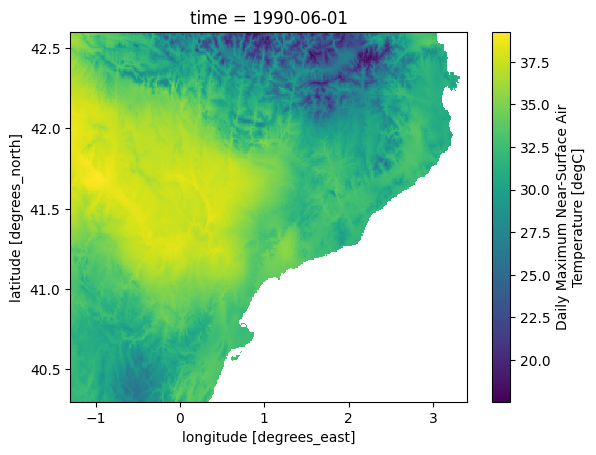

In [12]:
txx_jja.isel(time=0).plot()

In [9]:
txx_jja

<xarray.DataArray 'tasmax' (time: 16, lat: 276, lon: 564)> Size: 10MB
array([[[31.749994, 31.749994, 31.749994, ...,       nan,       nan,
               nan],
        [31.649988, 31.550013, 31.550013, ...,       nan,       nan,
               nan],
        [31.35    , 31.35    , 31.649988, ...,       nan,       nan,
               nan],
        ...,
        [36.05001 , 36.249992, 36.149986, ...,       nan,       nan,
               nan],
        [36.149986, 36.249992, 36.149986, ...,       nan,       nan,
               nan],
        [35.649986, 35.649986, 36.05001 , ...,       nan,       nan,
               nan]],

       [[32.649986, 32.649986, 32.649986, ...,       nan,       nan,
               nan],
        [32.450005, 32.450005, 32.35    , ...,       nan,       nan,
               nan],
        [32.149986, 32.249992, 32.450005, ...,       nan,       nan,
               nan],
...
        [35.249992, 35.55001 , 35.450005, ...,       nan,       nan,
               nan],
        [35.35    , 35.55001 , 35.55001 , ...,       nan,       nan,
               nan],
        [34.85    , 35.05001 , 35.450005, ...,       nan,       nan,
               nan]],

       [[35.149986, 35.249992, 35.249992, ...,       nan,       nan,
               nan],
        [34.950005, 34.950005, 34.950005, ...,       nan,       nan,
               nan],
        [34.649986, 34.649986, 35.05001 , ...,       nan,       nan,
               nan],
        ...,
        [36.149986, 36.249992, 36.249992, ...,       nan,       nan,
               nan],
        [36.149986, 36.149986, 36.149986, ...,       nan,       nan,
               nan],
        [35.85    , 35.85    , 36.05001 , ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 5kB -1.296 -1.288 -1.279 -1.271 ... 3.379 3.387 3.396
  * lat      (lat) float64 2kB 40.3 40.31 40.32 40.33 ... 42.57 42.58 42.59 42.6
  * time     (time) datetime64[ns] 128B 1990-06-01 1991-06-01 ... 2005-06-01
Attributes:
    grid_mapping:   crs
    long_name:      Daily Maximum Near-Surface Air Temperature
    standard_name:  air_temperature
    units:          degC

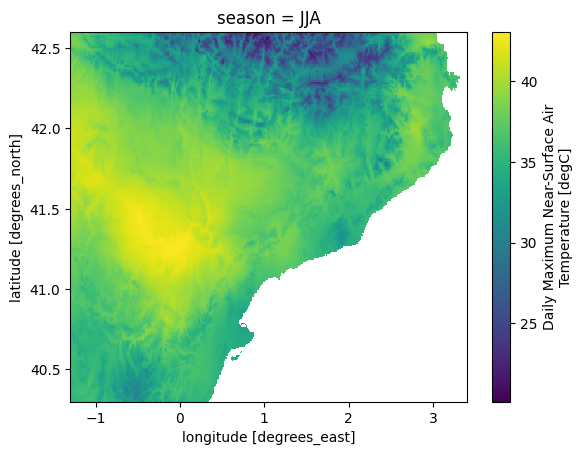

In [23]:
txx_jja.plot()

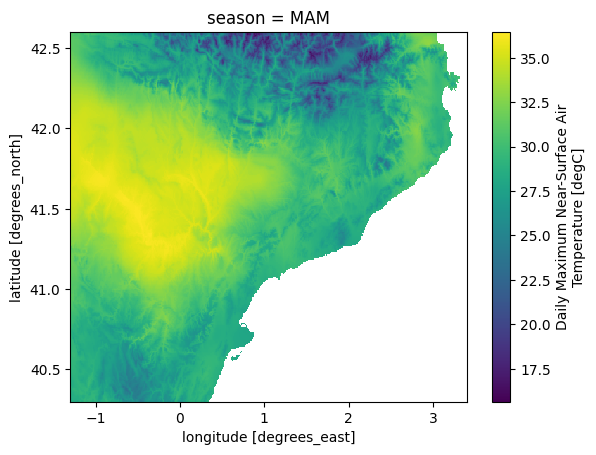

In [25]:
txx_mam.plot()

In [28]:
print(f"{outpath}Txx_Catalonia_1990_2005_jja.nc")

/mnt/stg/climate/CHELSA/CHELSA_EUR11/indicators/txx/Txx_Catalonia_1990_2005_jja.nc


In [28]:
txx_jja.to_netcdf(f"{outpath}Txx_Catalonia_1990_2005_jja.nc")
txx_son.to_netcdf(f"{outpath}Txx_Catalonia_1990_2005_son.nc")
txx_mam.to_netcdf(f"{outpath}Txx_Catalonia_1990_2005_mam.nc")
txx_djf.to_netcdf(f"{outpath}Txx_Catalonia_1990_2005_djf.nc")                  
                                    

In [29]:
txx_jja.mean(dim='time').to_netcdf(f"{outpath}Txx_Catalonia_1990_2005_jja_mean.nc")
txx_son.mean(dim='time').to_netcdf(f"{outpath}Txx_Catalonia_1990_2005_son_mean.nc")
txx_mam.mean(dim='time').to_netcdf(f"{outpath}Txx_Catalonia_1990_2005_mam_mean.nc")
txx_djf.mean(dim='time').to_netcdf(f"{outpath}Txx_Catalonia_1990_2005_djf_mean.nc")                  
                                    